In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)

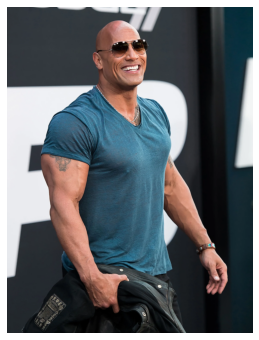

In [3]:
# load the image
img = cv2.imread('therock.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.axis("off")
plt.imshow(img)

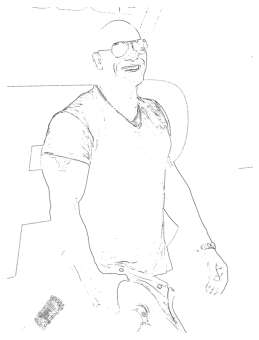

In [4]:
# edge mask generation
line_size = 7
blur_value = 7

gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_blur = cv2.medianBlur(gray_img, blur_value)
edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)


plt.axis("off")
plt.imshow(edges, cmap='gray')

In [5]:
# Color quantization with KMeans clustering
from sklearn.cluster import KMeans

k = 7
data = img.reshape(-1, 3)

kmeans = KMeans(n_clusters=k, random_state=42).fit(data)
img_reduced = kmeans.cluster_centers_[kmeans.labels_]
img_reduced = img_reduced.reshape(img.shape)

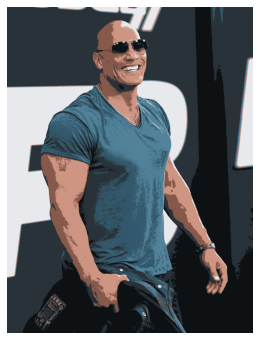

In [6]:
img_reduced = img_reduced.astype(np.uint8)

plt.axis("off")
plt.imshow(img_reduced)

In [7]:
# Bilateral Filter

blurred = cv2.bilateralFilter(img_reduced, d=7, sigmaColor=200,sigmaSpace=200)
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

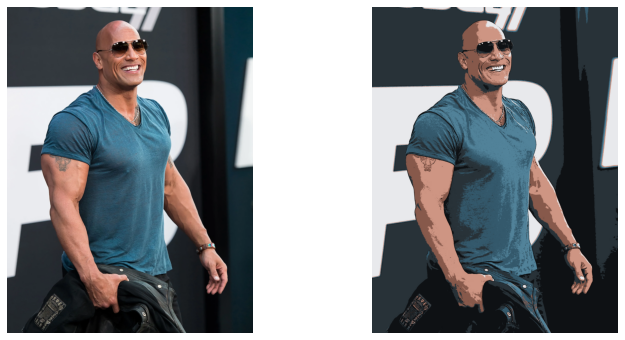

In [8]:
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(cartoon)

In [9]:
# export cartoon to a jpg file
cartoon_ = cv2.cvtColor(cartoon, cv2.COLOR_RGB2BGR)
cv2.imwrite('cartoon.png', cartoon_)

True